In [ ]:
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(1)

In [ ]:
###### FUNCTIONS #######

def get_weights_and_bias():
    w0 = (2/4) * np.random.random_sample(1) - (1/4)
    w1 = 2 * np.random.random_sample(1) - 1
    w2 = 2 * np.random.random_sample(1) - 1
    return w0, w1, w2

def get_vectors_s(n):
    S = 2 * np.random.random_sample((n,2)) - 1 
    return S

In [ ]:
S = get_vectors_s(100)

In [ ]:
w0i, w1i, w2i = get_weights_and_bias()
weights_i = np.array((w0i, w1i, w2i))
print(weights_i)

[[0.22508806]
 [0.11330638]
 [0.8312127 ]]


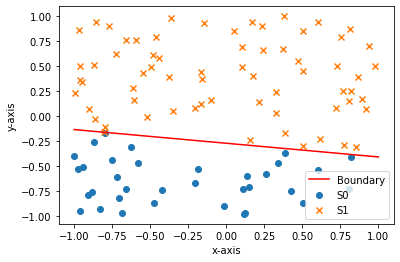

In [ ]:
S0 = np.empty(shape=(0,2),dtype='object') 
S1 = np.empty(shape=(0,2),dtype='object')
labels = np.empty(shape=(0, 1),dtype='int')

for vector in S:
    if np.dot([1, vector[0], vector[1]], weights_i) < 0:
        S0 = np.vstack((S0, vector))
        labels = np.vstack((labels, 0))
    elif np.dot([1, vector[0], vector[1]], weights_i) >= 0:
        S1 = np.vstack((S1, vector)) 
        labels = np.vstack((labels, 1)) 

plt.scatter(([vector[0] for vector in S0]), ([vector[1] for vector in S0]), marker='o', label='S0')
plt.scatter(([vector[0] for vector in S1]), ([vector[1] for vector in S1]), marker='x', label='S1')
x = np.linspace(-1,1)
y = (-w0i-w1i*x)/w2i
plt.plot(x, y, '-r', label='Boundary')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend()
plt.show()

In [ ]:
w0, w1, w2 = get_weights_and_bias()
weights = np.array((w0, w1, w2))
print(weights)

[[ 0.0707831 ]
 [-0.21998457]
 [-0.02801867]]


In [ ]:
class Perceptron(object):

    def __init__(self, num_of_inputs, weights, learning_rate):
        self.num_of_inputs = num_of_inputs
        self.learning_rate = learning_rate
        self.weights = weights
        self.epochs = 0
        self.misclassified = 0
        self.count = 0
        self.misclassified_list = []

    def predict(self, inputs):
        result = np.dot([1, inputs[0], inputs[1]], self.weights)
        if result >= 0:
            prediction = np.array([1])
        else:
            prediction = np.array([0])
        return prediction 

    def train(self, training_inputs, labels):
        self.misclassified = 0
        for label, inputs in zip(labels, training_inputs):
            self.count += 1
            prediction = self.predict(inputs)
            print(f'Input: {inputs}, Label: {label}, Prediction: {prediction}, Count: {self.count}')
            if prediction > label:
                self.weights[0] -= self.learning_rate * 1
                self.weights[1] -= self.learning_rate * inputs[0]
                self.weights[2] -= self.learning_rate * inputs[1]
                self.misclassified += 1
            elif prediction < label:
                self.weights[0] += self.learning_rate * 1
                self.weights[1] += self.learning_rate * inputs[0]
                self.weights[2] += self.learning_rate * inputs[1]
                self.misclassified += 1
            else:
                print('Prediction = Label') 
            print('Misclassified: ', self.misclassified)
        self.misclassified_list.append(self.misclassified)
        self.epochs += 1
        print(f'Weights: {self.weights}, Epochs: {self.epochs}')

In [ ]:
perceptron = Perceptron(2, weights, 0.1)

In [ ]:
perceptron.train(S, labels)
print(perceptron.misclassified)
while (perceptron.misclassified != 0):
    perceptron.train(S, labels)
print(perceptron.misclassified_list)

Input: [-0.16595599  0.44064899], Label: [1], Prediction: [1], Count: 1
Prediction = Label
Misclassified:  0
Input: [-0.99977125 -0.39533485], Label: [0], Prediction: [1], Count: 2
Misclassified:  1
Input: [-0.70648822 -0.81532281], Label: [0], Prediction: [1], Count: 3
Misclassified:  2
Input: [-0.62747958 -0.30887855], Label: [0], Prediction: [0], Count: 4
Prediction = Label
Misclassified:  2
Input: [-0.20646505  0.07763347], Label: [1], Prediction: [0], Count: 5
Misclassified:  3
Input: [-0.16161097  0.370439  ], Label: [1], Prediction: [1], Count: 6
Prediction = Label
Misclassified:  3
Input: [-0.5910955   0.75623487], Label: [1], Prediction: [1], Count: 7
Prediction = Label
Misclassified:  3
Input: [-0.94522481  0.34093502], Label: [1], Prediction: [1], Count: 8
Prediction = Label
Misclassified:  3
Input: [-0.1653904   0.11737966], Label: [1], Prediction: [0], Count: 9
Misclassified:  4
Input: [-0.71922612 -0.60379702], Label: [0], Prediction: [1], Count: 10
Misclassified:  5
Inpu

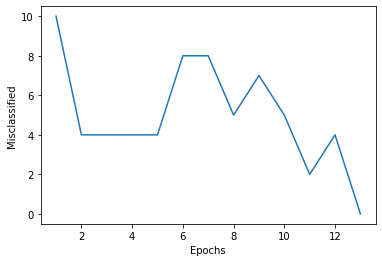

In [ ]:
epochs = np.arange(1, perceptron.epochs+1)
plt.plot(epochs, perceptron.misclassified_list)
plt.xlabel('Epochs')
plt.ylabel('Misclassified')
plt.show()